In [34]:
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten

from sklearn.metrics import confusion_matrix

In [18]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()


X_train, X_test = X_train / 255, X_test / 255


X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [19]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [20]:
K = len(np.unique(Y_test))
K

10

In [22]:
i = Input(shape=X_train[0].shape)

x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Flatten()(x)

x = Dense(512, activation='relu')(x)
x = Dense(K, activation='softmax')(x)

model = Model(inputs=i, outputs=x)

In [23]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=15)

Epoch 1/15
   1/1875 [..............................] - ETA: 4:44 - loss: 2.3054 - accuracy: 0.0000e+00

2024-12-30 18:20:59.283237: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 6s 3ms/step - loss: 0.4903 - accuracy: 0.8172 - val_loss: 0.3875 - val_accuracy: 0.8572
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3294 - accuracy: 0.8763 - val_loss: 0.3363 - val_accuracy: 0.8752
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2820 - accuracy: 0.8943 - val_loss: 0.3128 - val_accuracy: 0.8860
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2447 - accuracy: 0.9088 - val_loss: 0.3147 - val_accuracy: 0.8840
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2143 - accuracy: 0.9194 - val_loss: 0.2986 - val_accuracy: 0.8920
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1877 - accuracy: 0.9280 - val_loss: 0.3086 - val_accuracy: 0.8929
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1622 - accuracy: 0.9376 - val_loss: 0.3168 - val_accuracy: 0.8954
Epo

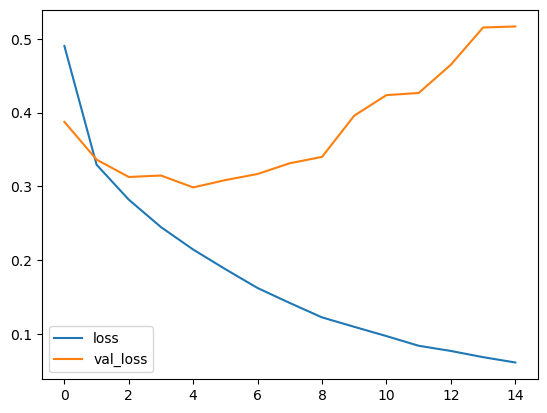

In [26]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

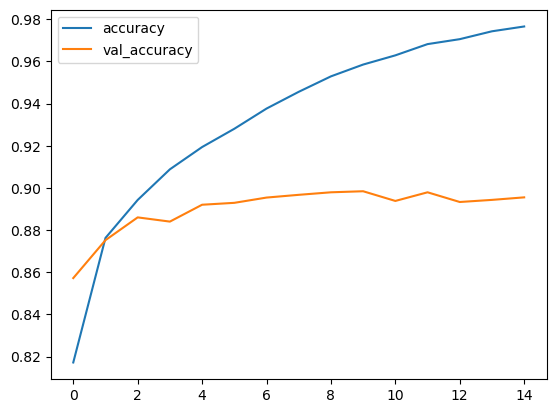

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

313/313 [==============================] - 0s 1ms/step
Confusion matrix, without normalization
[[854   2  26  16   2   1  89   0  10   0]
 [  3 976   2  13   2   0   3   0   1   0]
 [ 25   0 852  10  43   0  69   0   1   0]
 [ 22   9  17 876  35   0  36   0   5   0]
 [  2   0  76  18 826   0  78   0   0   0]
 [  0   0   0   1   0 973   0  18   1   7]
 [111   0  71  20  76   0 712   0  10   0]
 [  0   0   0   0   0   9   0 974   1  16]
 [  5   0   6   1   6   3   7   3 968   1]
 [  0   0   0   0   0   4   1  50   1 944]]


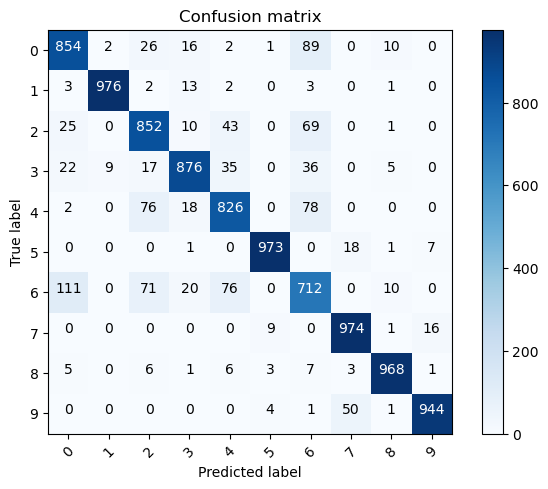

In [35]:
def plot_confusion_matrix(
    cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues
):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')

    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment='center',
            color='white' if cm[i, j] > thresh else 'black',
        )

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(Y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [36]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split(
    '\n'
)

Text(0.5, 1.0, 'True label: Shirt, Predicted: Coat')

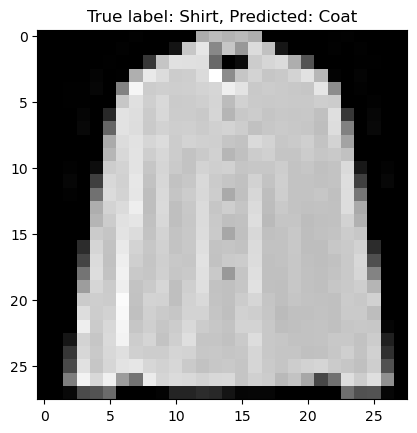

In [42]:
misclassified_index = np.where(p_test != Y_test)[0]

i = np.random.choice(misclassified_index)
plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
plt.title(f'True label: {labels[Y_test[i]]}, Predicted: {labels[p_test[i]]}')